In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('heart_disease.csv')
df.shape

(253680, 22)

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [4]:
# 1. Remove duplicates
df_cleaned = df.drop_duplicates()

# 2. Handle outliers in BMI, MentHlth, and PhysHlth (if any extreme values are found)
# Here, we'll set arbitrary thresholds (BMI > 60 or < 10, MentHlth or PhysHlth > 30 is considered outlier)
df_cleaned = df_cleaned[(df_cleaned['BMI'] <= 60) & (df_cleaned['BMI'] >= 10)]
df_cleaned = df_cleaned[(df_cleaned['MentHlth'] <= 30) & (df_cleaned['PhysHlth'] <= 30)]

# 3. Rename columns for consistency
df_cleaned.rename(columns={'HeartDiseaseorAttack': 'HeartDisease', 'HvyAlcoholConsump': 'HeavyAlcohol'}, inplace=True)

# 4. (Optional) Encoding categorical data back from numerical representations (for user interpretability)
# For example, Gender and General Health levels could be mapped to categories

# Check the cleaned dataset
df_cleaned.head()

,HeartDisease,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


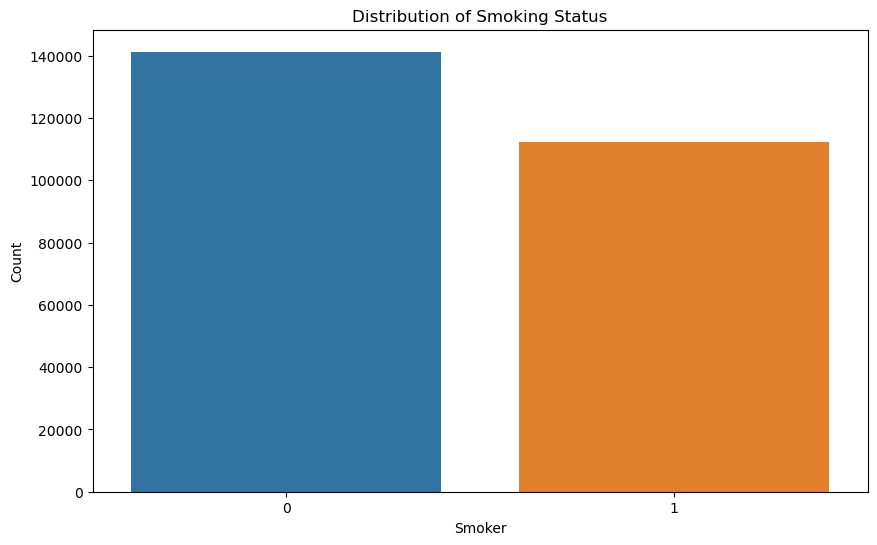

Percentage distribution for Smoker:
0    55.683144
1    44.316856
Name: Smoker, dtype: float64


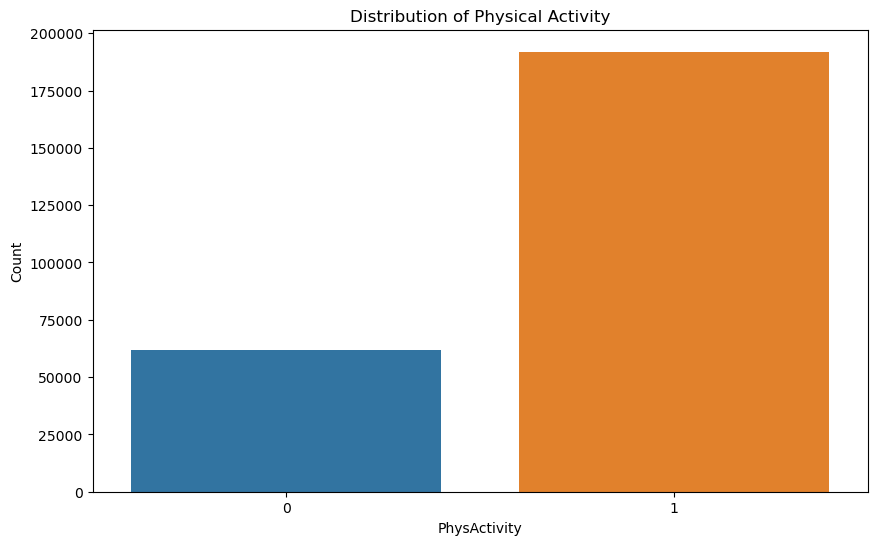

Percentage distribution for PhysActivity:
1    75.654368
0    24.345632
Name: PhysActivity, dtype: float64


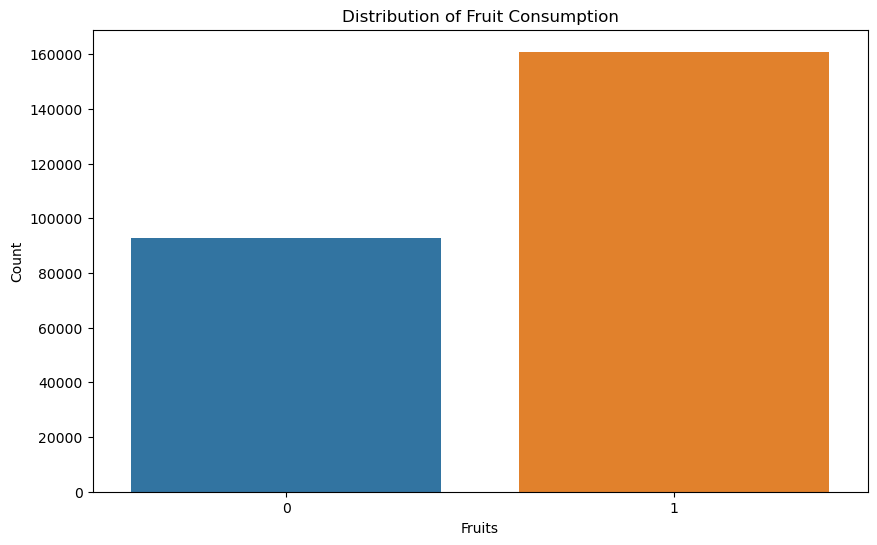

Percentage distribution for Fruits:
1    63.425576
0    36.574424
Name: Fruits, dtype: float64


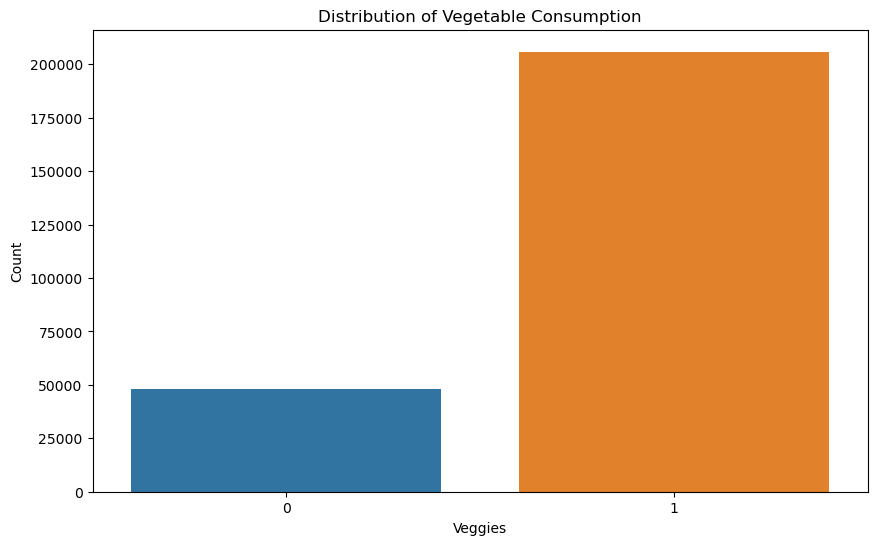

Percentage distribution for Veggies:
1    81.14199
0    18.85801
Name: Veggies, dtype: float64
Overall summary:
              Smoker   PhysActivity         Fruits        Veggies
count  253680.000000  253680.000000  253680.000000  253680.000000
mean        0.443169       0.756544       0.634256       0.811420
std         0.496761       0.429169       0.481639       0.391175
min         0.000000       0.000000       0.000000       0.000000
25%         0.000000       1.000000       0.000000       1.000000
50%         0.000000       1.000000       1.000000       1.000000
75%         1.000000       1.000000       1.000000       1.000000
max         1.000000       1.000000       1.000000       1.000000


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'heart_disease.csv'
df = pd.read_csv(file_path)

# Create a function to plot bar charts
def plot_categorical_distribution(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()
    
    # Calculate and print percentages
    value_counts = data[column].value_counts(normalize=True) * 100
    print(f"\
Percentage distribution for {column}:")
    print(value_counts)

# Plot distributions
plot_categorical_distribution(df, 'Smoker', 'Distribution of Smoking Status')
plot_categorical_distribution(df, 'PhysActivity', 'Distribution of Physical Activity')
plot_categorical_distribution(df, 'Fruits', 'Distribution of Fruit Consumption')
plot_categorical_distribution(df, 'Veggies', 'Distribution of Vegetable Consumption')

# Print overall summary
print("\
Overall summary:")
summary_df = df[['Smoker', 'PhysActivity', 'Fruits', 'Veggies']].describe()
print(summary_df)

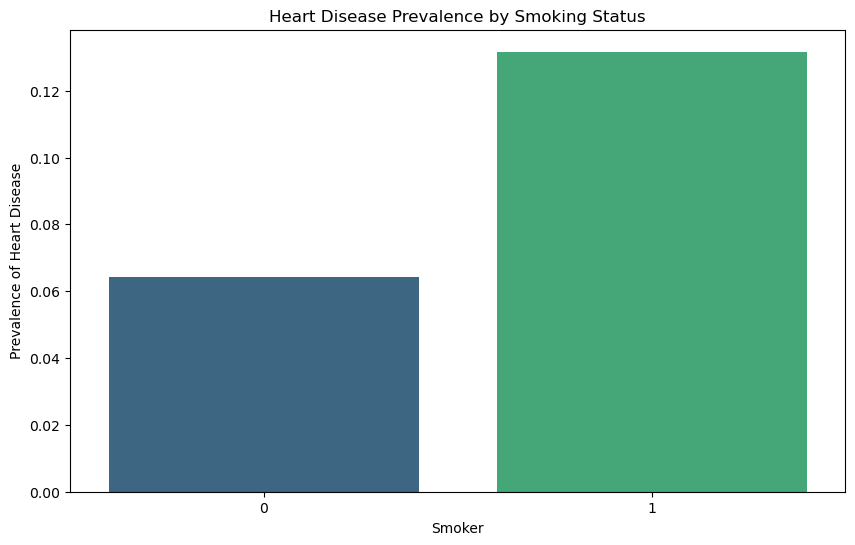

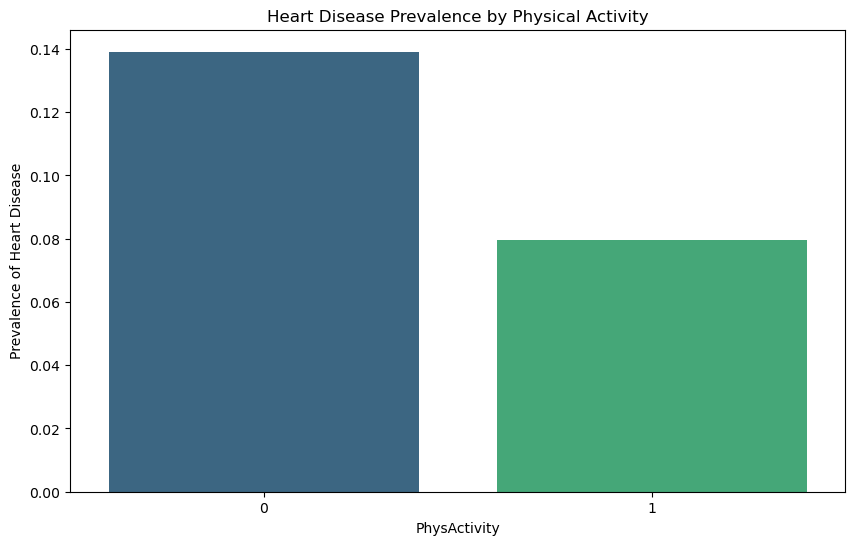

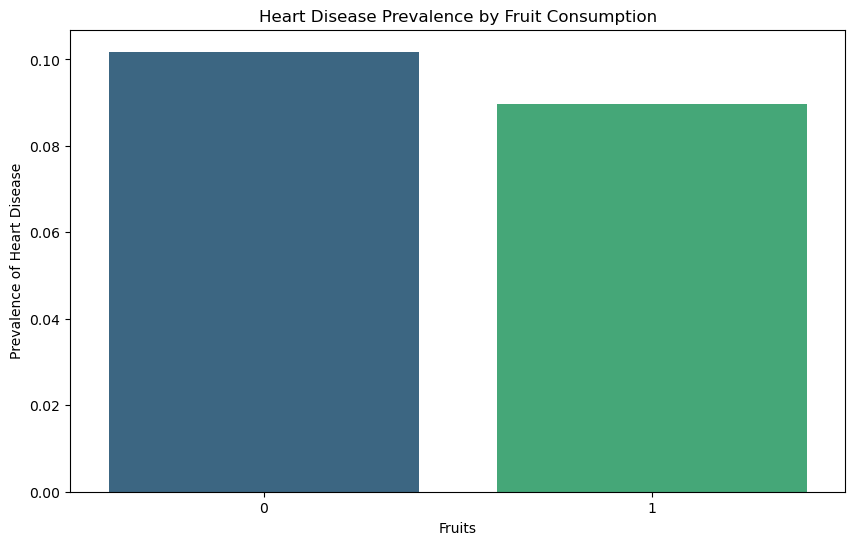

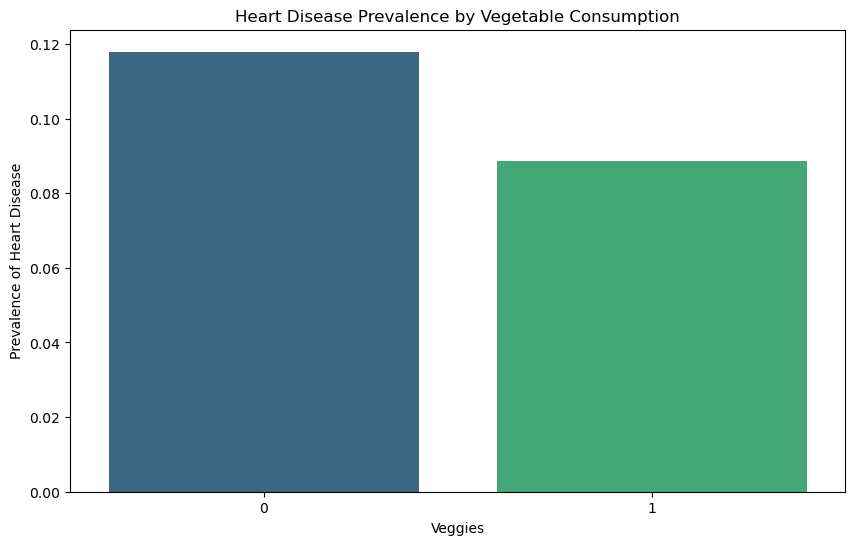

In [6]:
# Create grouped bar charts to compare heart disease prevalence across categorical variables

def plot_grouped_bar(data, category, title):
    # Create a pivot table for heart disease prevalence by category
    pivot = data.pivot_table(values='HeartDiseaseorAttack', index=category, aggfunc='mean')
    
    # Plot the grouped bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=pivot.index, y=pivot['HeartDiseaseorAttack'], palette='viridis')
    plt.title(title)
    plt.xlabel(category)
    plt.ylabel('Prevalence of Heart Disease')
    plt.xticks(rotation=0)
    plt.show()

# Plot grouped bar charts for each categorical variable
plot_grouped_bar(df, 'Smoker', 'Heart Disease Prevalence by Smoking Status')
plot_grouped_bar(df, 'PhysActivity', 'Heart Disease Prevalence by Physical Activity')
plot_grouped_bar(df, 'Fruits', 'Heart Disease Prevalence by Fruit Consumption')
plot_grouped_bar(df, 'Veggies', 'Heart Disease Prevalence by Vegetable Consumption')

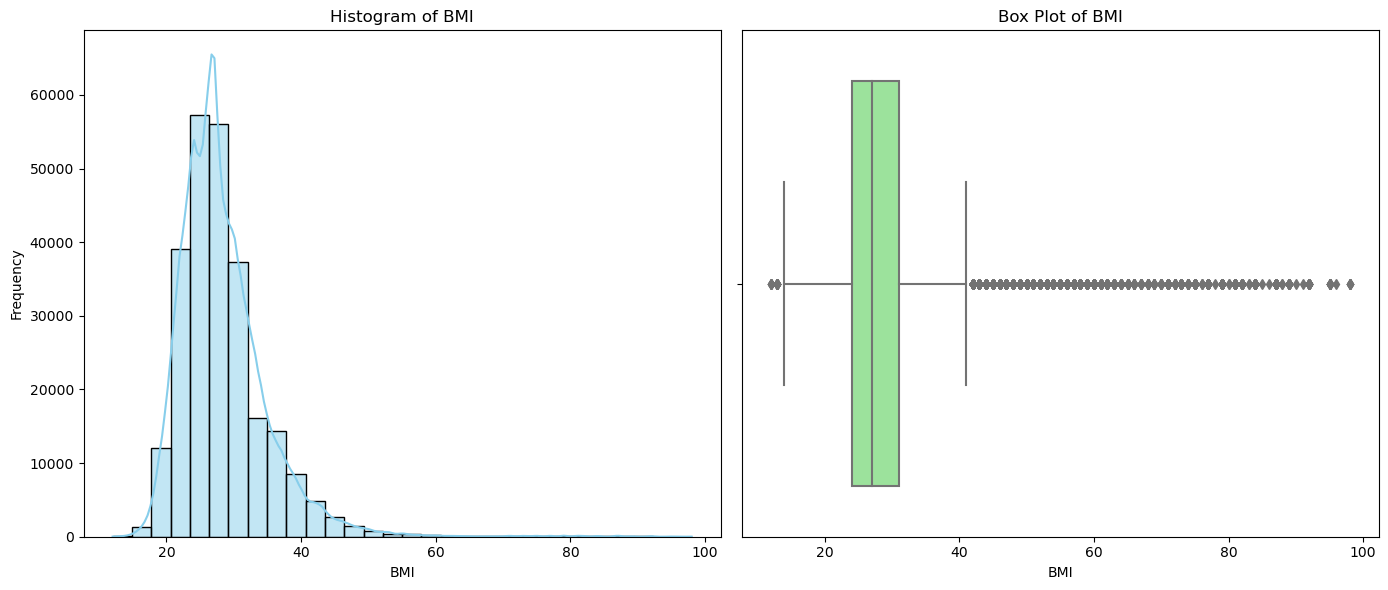

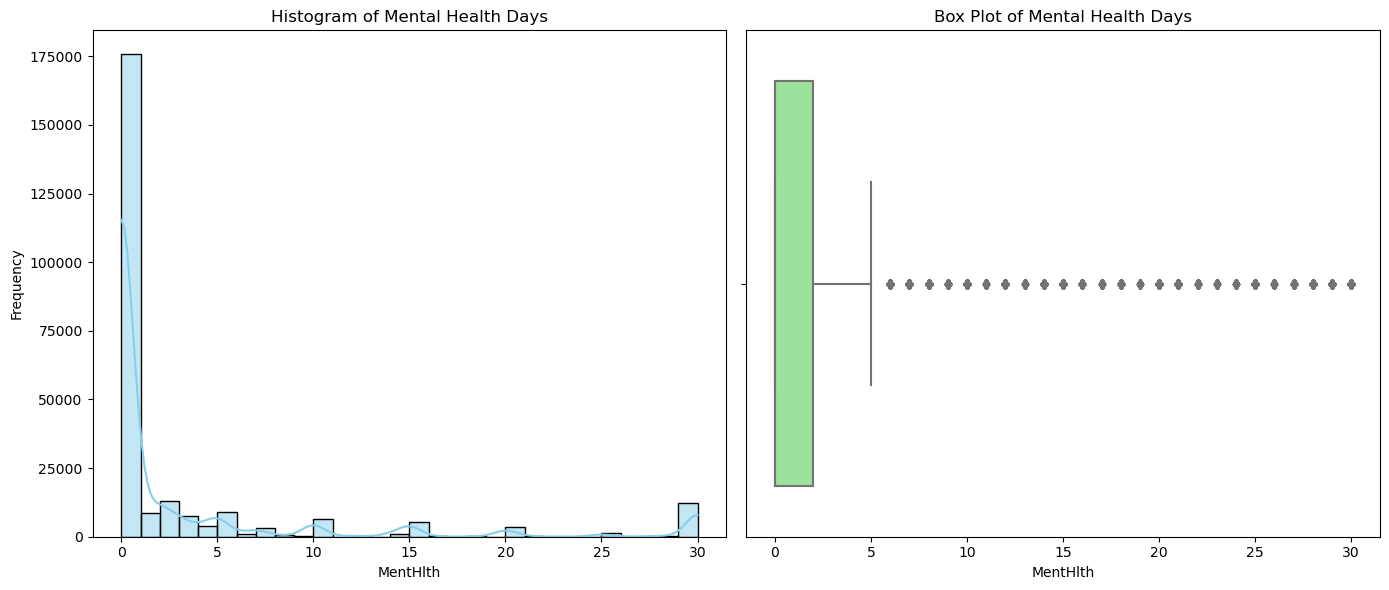

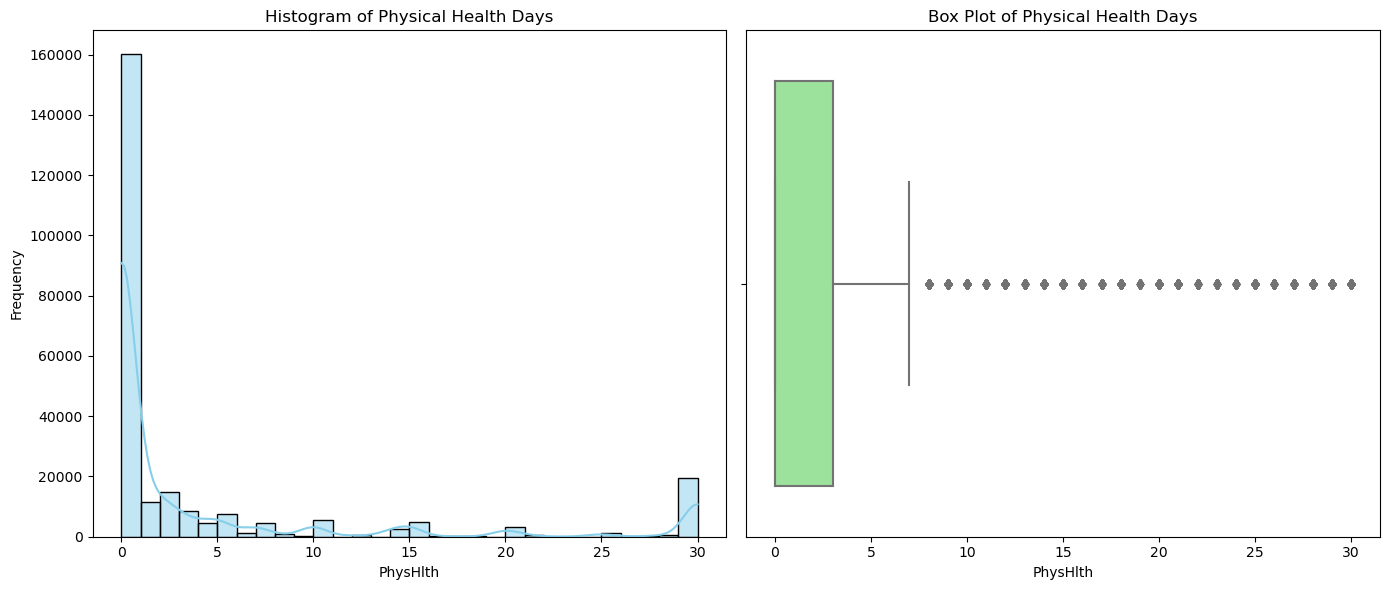

In [7]:
# Create histograms and box plots for continuous variables

def plot_histogram_and_boxplot(data, column, title):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Histogram
    sns.histplot(data[column], bins=30, kde=True, ax=axs[0], color='skyblue')
    axs[0].set_title('Histogram of ' + title)
    axs[0].set_xlabel(column)
    axs[0].set_ylabel('Frequency')
    
    # Box plot
    sns.boxplot(x=data[column], ax=axs[1], color='lightgreen')
    axs[1].set_title('Box Plot of ' + title)
    axs[1].set_xlabel(column)
    
    plt.tight_layout()
    plt.show()

# Plot for BMI
plot_histogram_and_boxplot(df, 'BMI', 'BMI')

# Plot for Mental Health Days
plot_histogram_and_boxplot(df, 'MentHlth', 'Mental Health Days')

# Plot for Physical Health Days
plot_histogram_and_boxplot(df, 'PhysHlth', 'Physical Health Days')

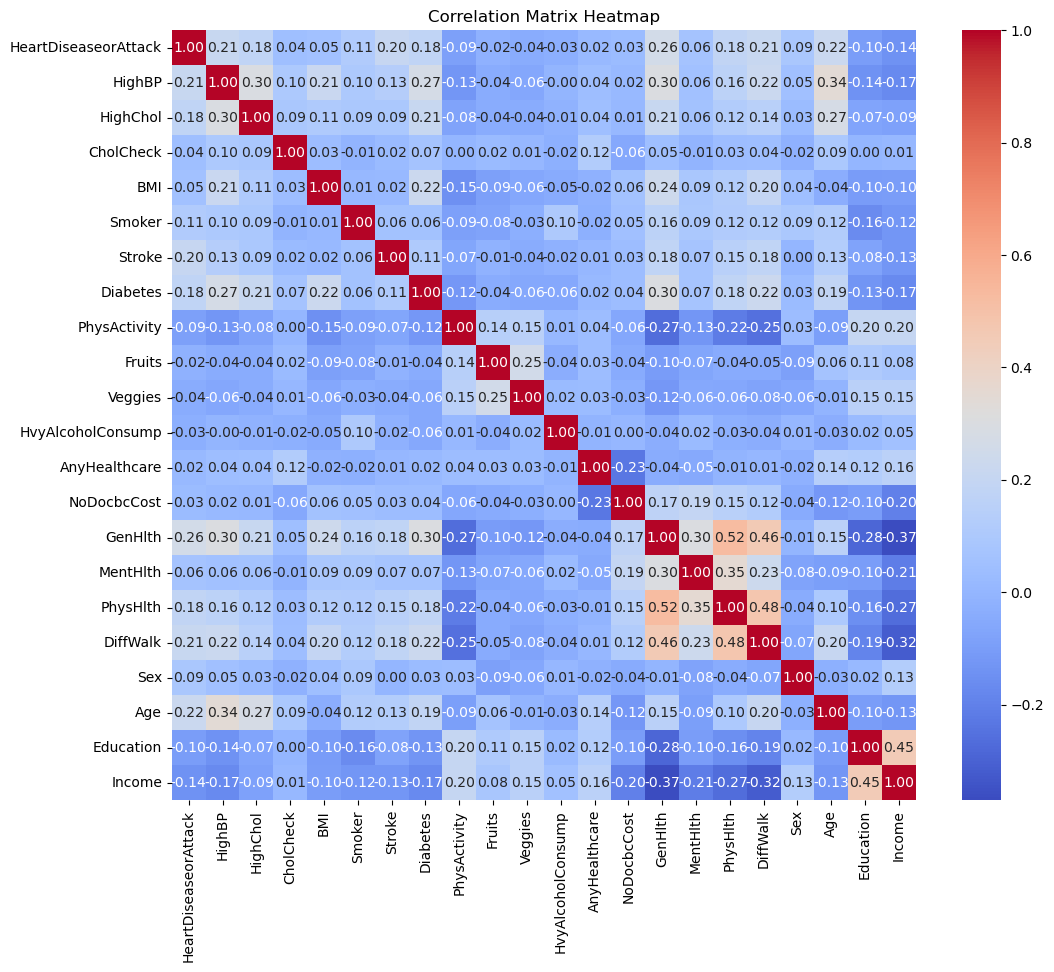

In [8]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

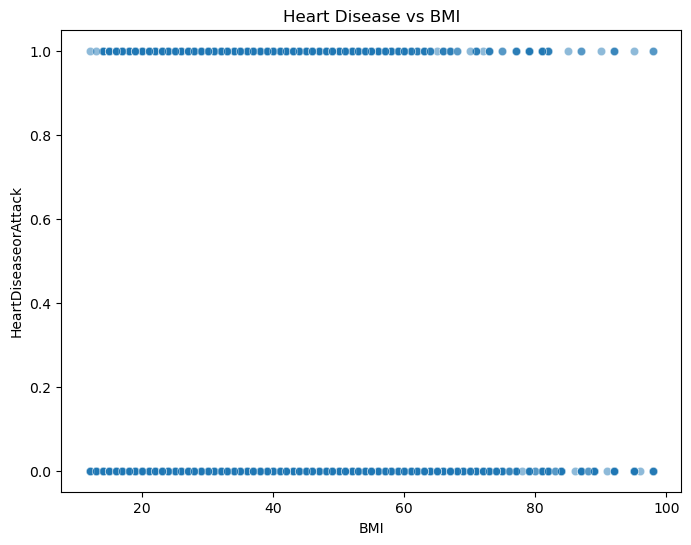

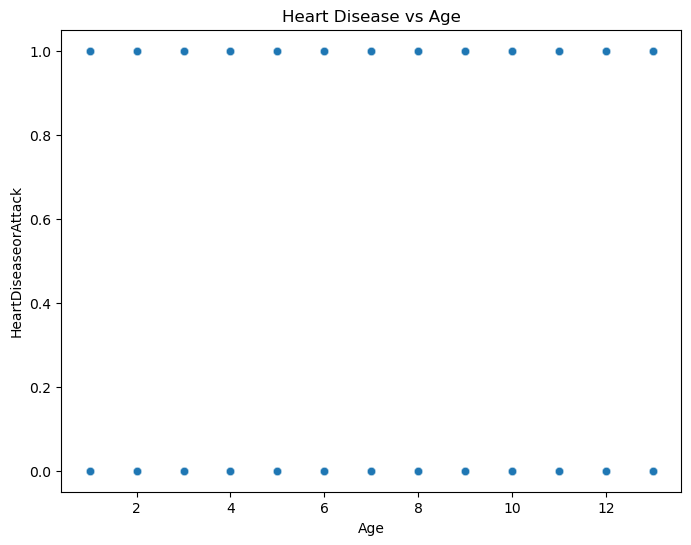

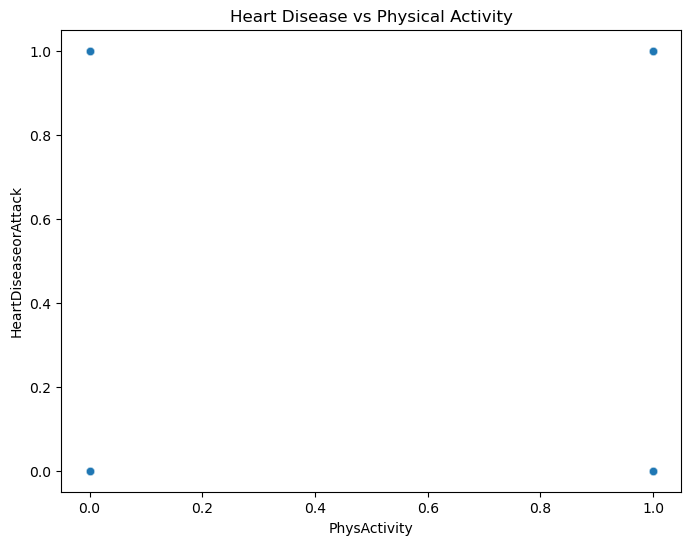

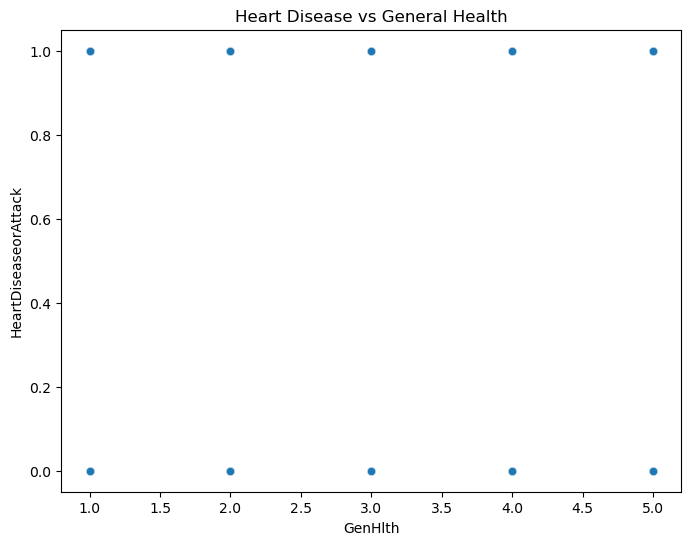

In [9]:
# Create scatter plots to explore relationships between pairs of variables

def plot_scatter(data, x, y, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x, y=y, data=data, alpha=0.5)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Scatter plots for variables potentially associated with heart disease
plot_scatter(df, 'BMI', 'HeartDiseaseorAttack', 'Heart Disease vs BMI')
plot_scatter(df, 'Age', 'HeartDiseaseorAttack', 'Heart Disease vs Age')
plot_scatter(df, 'PhysActivity', 'HeartDiseaseorAttack', 'Heart Disease vs Physical Activity')
plot_scatter(df, 'GenHlth', 'HeartDiseaseorAttack', 'Heart Disease vs General Health')

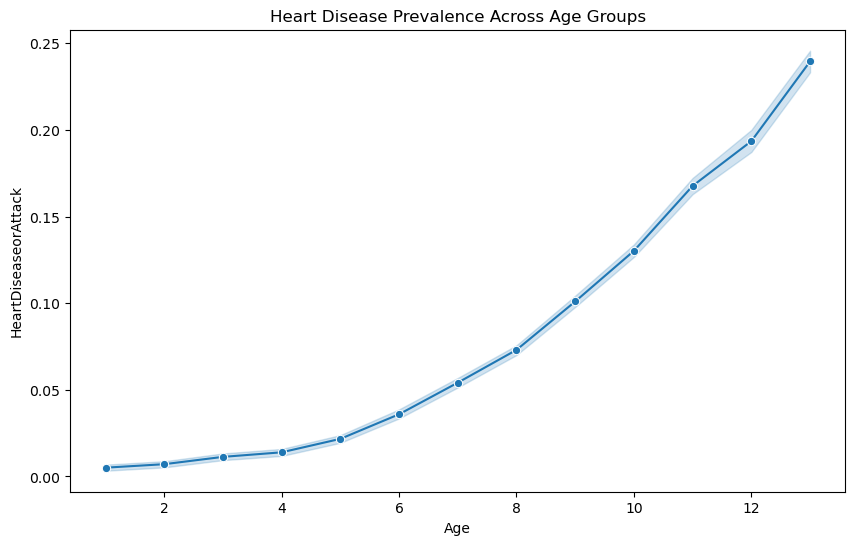

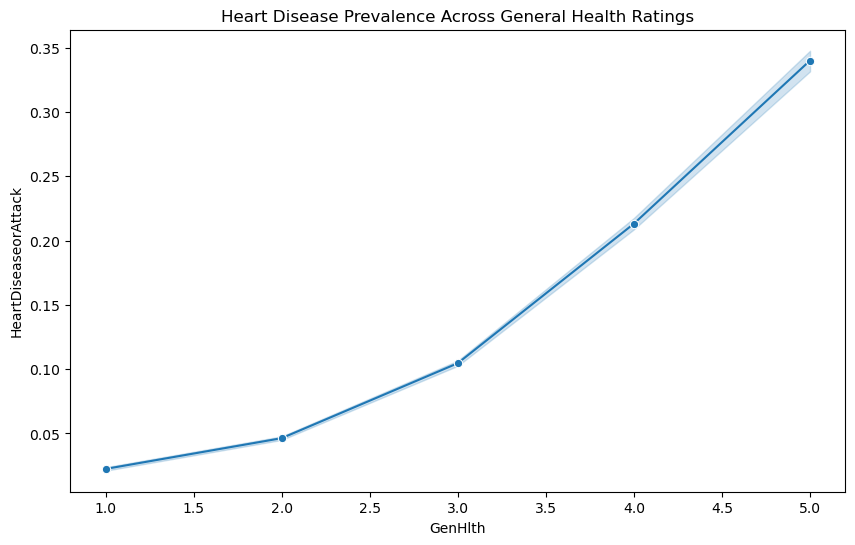

In [10]:
def plot_line(data, x, y, title):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x, y=y, data=data, marker='o')
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Line plot for heart disease prevalence across age groups
plot_line(df, 'Age', 'HeartDiseaseorAttack', 'Heart Disease Prevalence Across Age Groups')

# Line plot for heart disease prevalence across general health ratings
plot_line(df, 'GenHlth', 'HeartDiseaseorAttack', 'Heart Disease Prevalence Across General Health Ratings')

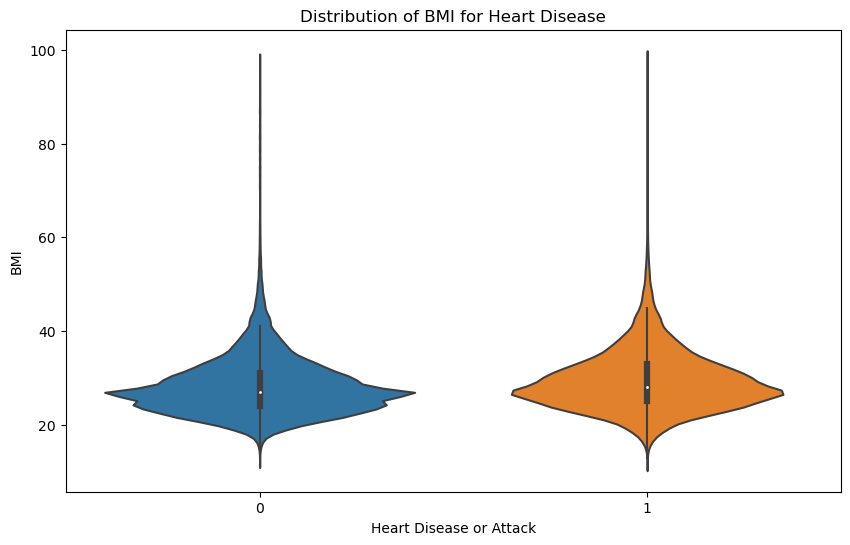

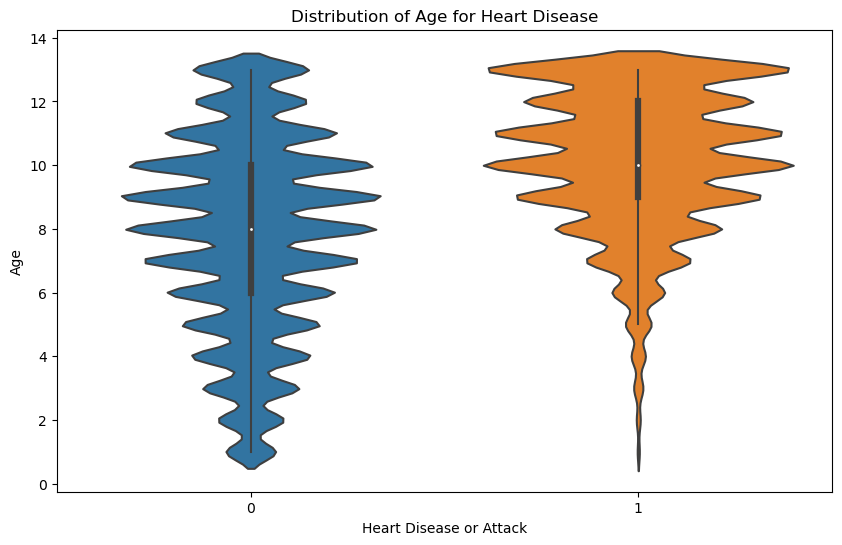

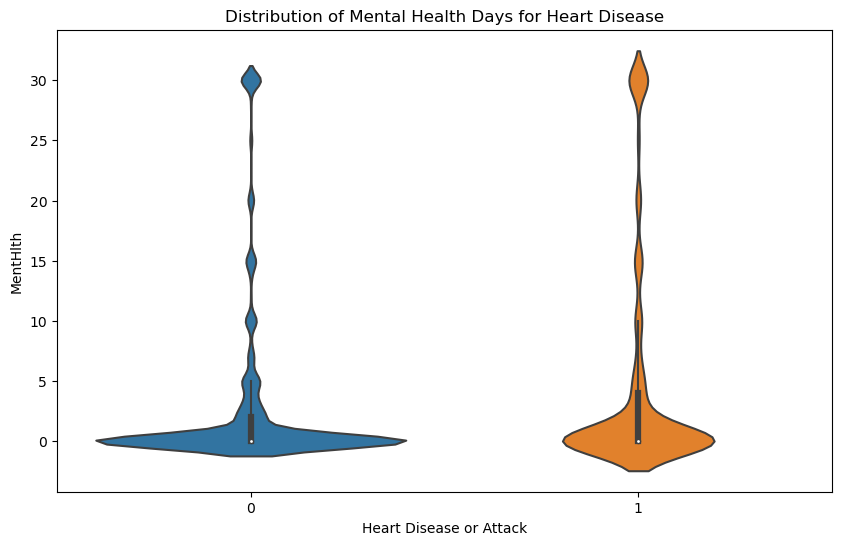

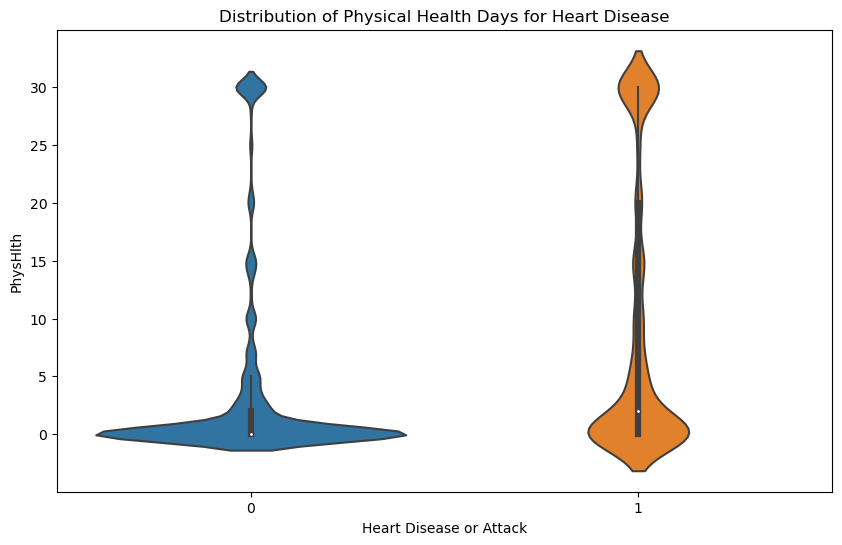

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_violin(data, x, y, title):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=x, y=y, data=data, split=True)
    plt.title(title)
    plt.xlabel('Heart Disease or Attack')
    plt.ylabel(y)
    plt.show()

# Violin plot for BMI
plot_violin(df, 'HeartDiseaseorAttack', 'BMI', 'Distribution of BMI for Heart Disease')

# Violin plot for Age
plot_violin(df, 'HeartDiseaseorAttack', 'Age', 'Distribution of Age for Heart Disease')

# Violin plot for Mental Health Days
plot_violin(df, 'HeartDiseaseorAttack', 'MentHlth', 'Distribution of Mental Health Days for Heart Disease')

# Violin plot for Physical Health Days
plot_violin(df, 'HeartDiseaseorAttack', 'PhysHlth', 'Distribution of Physical Health Days for Heart Disease')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant variables for the pair plot
variables = ['Age', 'BMI', 'GenHlth', 'PhysHlth', 'MentHlth', 'PhysActivity', 'HeartDiseaseorAttack']

# Create a subset of the dataframe with these variables
df_subset = df[variables]

# Create the pair plot
plt.figure(figsize=(16, 14))
sns.pairplot(df_subset, hue='HeartDiseaseorAttack', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Health Indicators and Heart Disease', y=1.02)
plt.tight_layout()
plt.show()

print("Pair plot generated successfully.")